In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  confusion_matrix, recall_score, precision_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Loading the data

In [25]:
data_path = r"/content/drive/MyDrive/Tài liệu học/Năm 3/Kì 2/Machine Learning/Bài tập lớn/Data/emails.csv"
df = pd.read_csv(data_path)
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [ ]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64


In [ ]:
text_col = 'Email No.' if 'Email No.' in df.columns else df.columns[0]
label_col = 'Prediction' if 'Prediction' in df.columns else df.columns[3002]

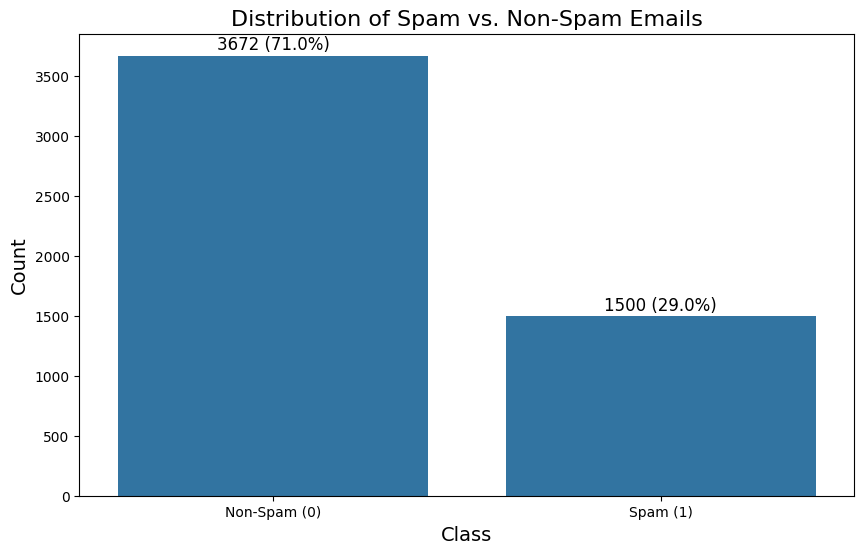

In [ ]:
plt.figure(figsize=(10, 6))
class_counts = df[label_col].value_counts()
ax = sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribution of Spam vs. Non-Spam Emails', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
# Add count labels on top of bars
for i, count in enumerate(class_counts.values):
    ax.text(i, count + 50, f"{count} ({count/len(df):.1%})", ha='center', fontsize=12)

plt.xticks([0, 1], ['Non-Spam (0)', 'Spam (1)'])
plt.show()

In [ ]:
print(f"Dataset shape: {df.shape}")
print(df.head())
print(df.columns)

Dataset shape: (5172, 3002)
  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
Index(['Email No.', 'the', 'to', '

In [27]:
X = df.drop(columns=['Email No.', 'Prediction'])
y = df['Prediction']

print(X.shape)
print(y.shape)

(5172, 3000)
(5172,)


# Data Preprocessing

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

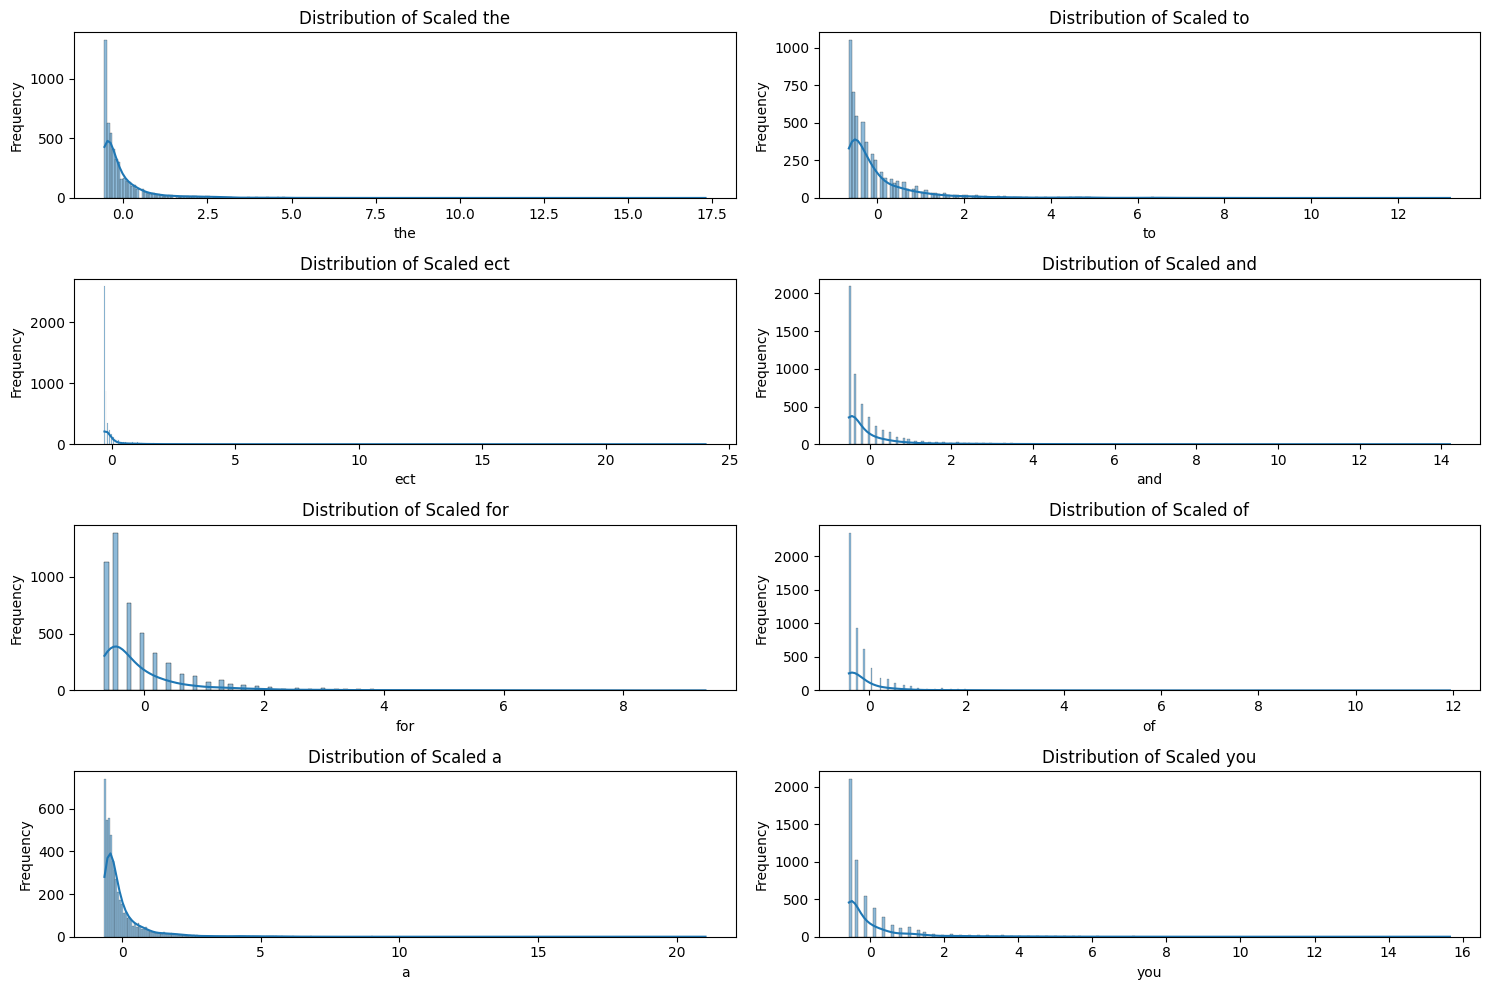

In [ ]:
# Convert scaled data back to DataFrame for easier plotting (optional but helpful)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Select a few features to visualize their distributions after scaling
selected_features = ['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you']

# Plot the distributions of the selected scaled features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(4, 2, i + 1)
    sns.histplot(X_scaled_df[feature], kde=True)
    plt.title(f'Distribution of Scaled {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Apply pca


In [ ]:
# Apply PCA
pca = PCA(n_components=774)
X_pca = pca.fit_transform(X_scaled)

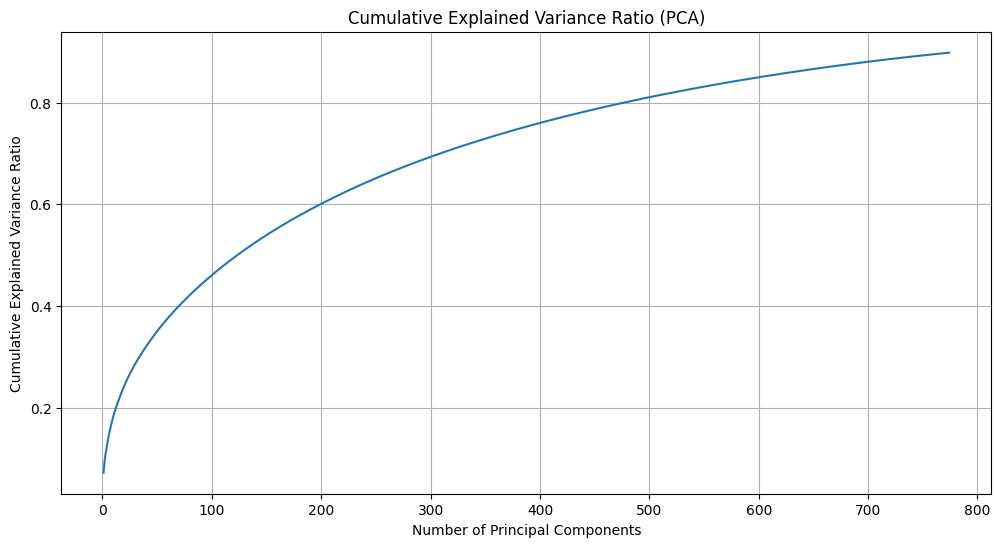

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio (PCA)')
plt.grid(True)
plt.show()

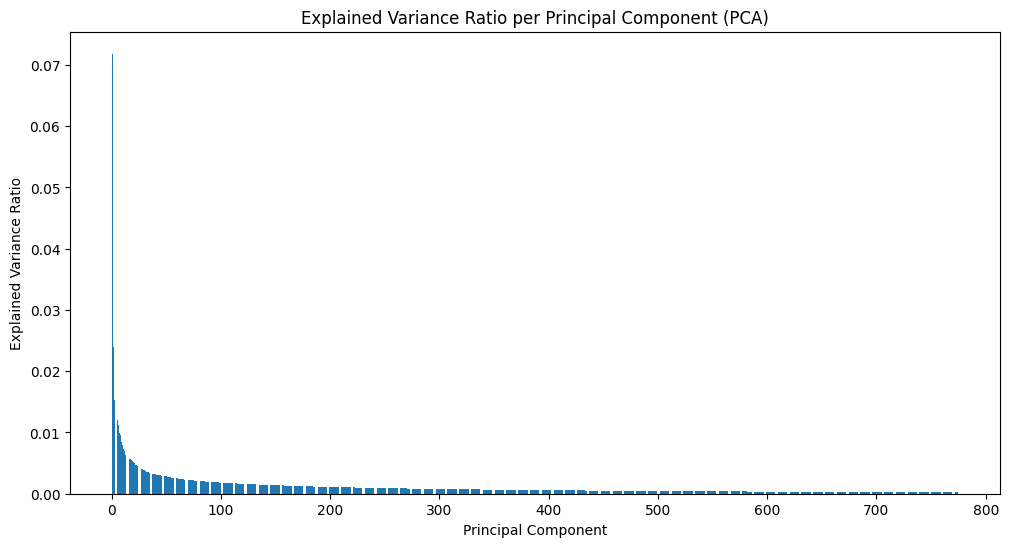

In [ ]:
# Visualize the explained variance ratio
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (PCA)')
plt.show()

## Perform k-means clustering on pca-transformed data


In [ ]:
from sklearn.cluster import KMeans

kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_pca_labels = kmeans_pca.fit_predict(X_pca)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
silhouette_kmeans = silhouette_score(X, kmeans_pca_labels)
davies_bouldin_kmeans = davies_bouldin_score(X, kmeans_pca_labels)
adjusted_rand_kmeans = adjusted_rand_score(y, kmeans_pca_labels)

print("K-Means Clustering on data:")
print(f"  Silhouette Score: {silhouette_pca_kmeans:.4f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_pca_kmeans:.4f}")
print(f"  Adjusted Rand Index: {adjusted_rand_pca_kmeans:.4f}")


K-Means Clustering on PCA-transformed data:
  Silhouette Score: 0.6924
  Davies-Bouldin Index: 2.6078
  Adjusted Rand Index: 0.0400


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score

silhouette_pca_kmeans = silhouette_score(X_pca, kmeans_pca_labels)
davies_bouldin_pca_kmeans = davies_bouldin_score(X_pca, kmeans_pca_labels)
adjusted_rand_pca_kmeans = adjusted_rand_score(y, kmeans_pca_labels)

print("K-Means Clustering on PCA-transformed data:")
print(f"  Silhouette Score: {silhouette_pca_kmeans:.4f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_pca_kmeans:.4f}")
print(f"  Adjusted Rand Index: {adjusted_rand_pca_kmeans:.4f}")

K-Means Clustering on PCA-transformed data:
  Silhouette Score: 0.6924
  Davies-Bouldin Index: 2.6078
  Adjusted Rand Index: 0.0400


In [ ]:

kmeans_pca_results = pd.DataFrame({'cluster_label': kmeans_pca_labels, 'original_label': y})


cluster_label_counts_kmeans_pca = kmeans_pca_results.groupby('cluster_label')['original_label'].value_counts().unstack(fill_value=0)


cluster_label_proportions_kmeans_pca = cluster_label_counts_kmeans_pca.apply(lambda x: x / x.sum(), axis=1)

print("\nOriginal Label Distribution within K-Means Clusters (PCA):")
print(cluster_label_counts_kmeans_pca)
print("\nProportion of Original Labels within K-Means Clusters (PCA):")
print(cluster_label_proportions_kmeans_pca)


Original Label Distribution within K-Means Clusters (PCA):
original_label     0     1
cluster_label             
0               3631  1410
1                 41    90

Proportion of Original Labels within K-Means Clusters (PCA):
original_label         0         1
cluster_label                     
0               0.720294  0.279706
1               0.312977  0.687023


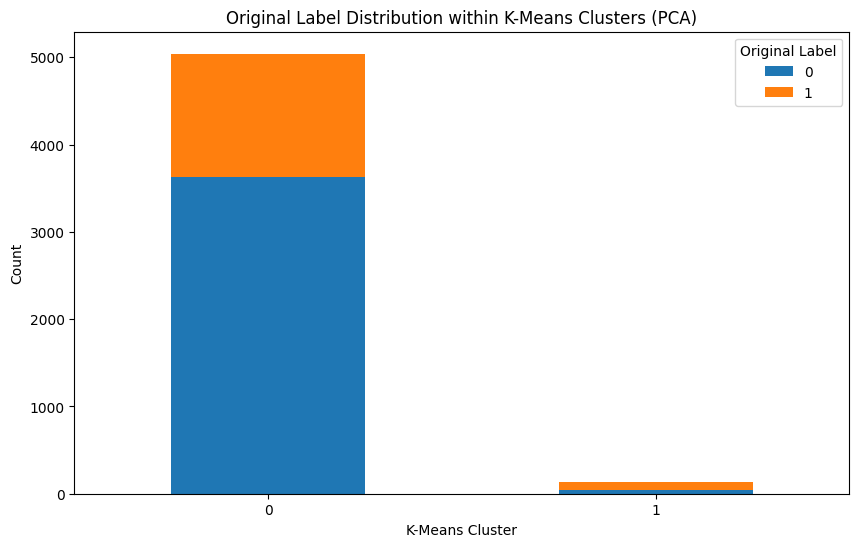

In [ ]:
# Plot the distribution of original labels within each cluster
plt.figure(figsize=(10, 6)) # Create a new figure for the first plot
cluster_label_counts_kmeans_pca.plot(kind='bar', stacked=True, figsize=(10, 6), ax=plt.gca()) # Use gca() to plot on the current figure
plt.title('Original Label Distribution within K-Means Clusters (PCA)')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Original Label')
plt.show()

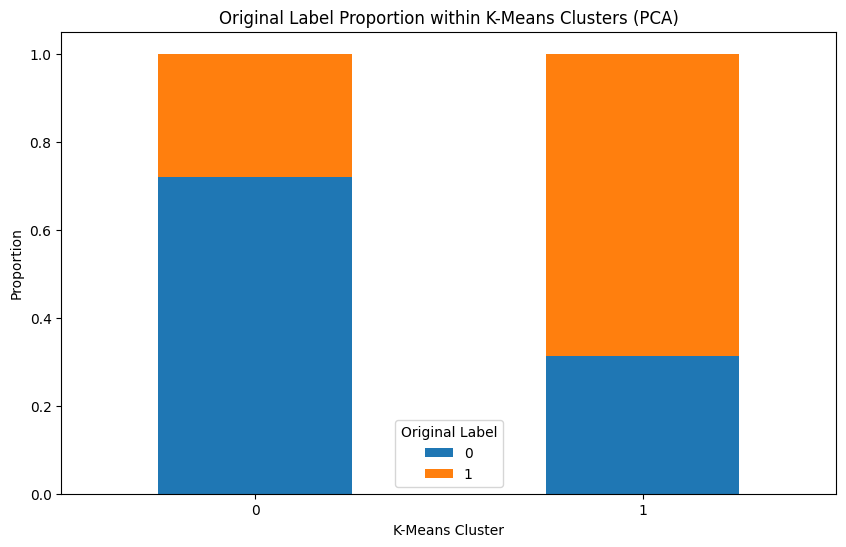

In [ ]:
# Plot the proportion of original labels within each cluster
plt.figure(figsize=(10, 6)) # Create a new figure for the second plot
cluster_label_proportions_kmeans_pca.plot(kind='bar', stacked=True, figsize=(10, 6), ax=plt.gca()) # Use gca() to plot on the current figure
plt.title('Original Label Proportion within K-Means Clusters (PCA)')
plt.xlabel('K-Means Cluster')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.legend(title='Original Label')
plt.show()

## Perform dbscan clustering on pca-transformed data



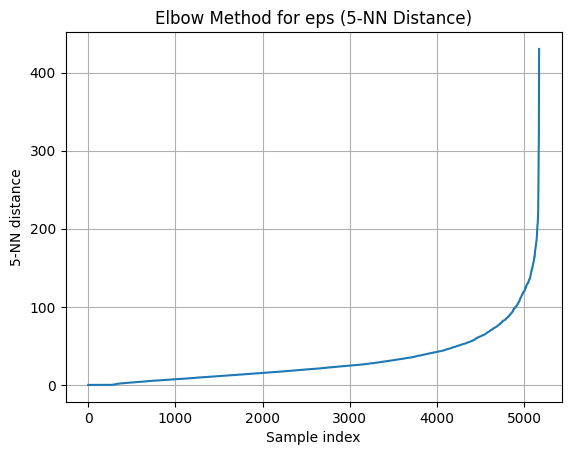

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, _ = neighbors_fit.kneighbors(X_pca)
distances = np.sort(distances[:, 4])  # khoảng cách đến người hàng xóm thứ 5

plt.plot(distances)
plt.title("Elbow Method for eps (5-NN Distance)")
plt.xlabel("Sample index")
plt.ylabel("5-NN distance")
plt.grid()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan_pca = DBSCAN(eps=90, min_samples=5)
dbscan_pca_labels = dbscan_pca.fit_predict(X_pca)

In [ ]:
mask = dbscan_pca_labels != -1
X_pca_valid = X_pca[mask]
labels_valid = dbscan_pca_labels[mask]


sil_score = silhouette_score(X_pca_valid, labels_valid)


db_index = davies_bouldin_score(X_pca_valid, labels_valid)

ari_score = adjusted_rand_score(y, dbscan_pca_labels)

print(f"DBSCAN - Silhouette Score: {sil_score:.4f}")
print(f"DBSCAN - Davies-Bouldin Index: {db_index:.4f}")
print(f"DBSCAN - Adjusted Rand Index: {ari_score:.4f}")

DBSCAN - Silhouette Score: 0.5995
DBSCAN - Davies-Bouldin Index: 0.3347
DBSCAN - Adjusted Rand Index: 0.0311


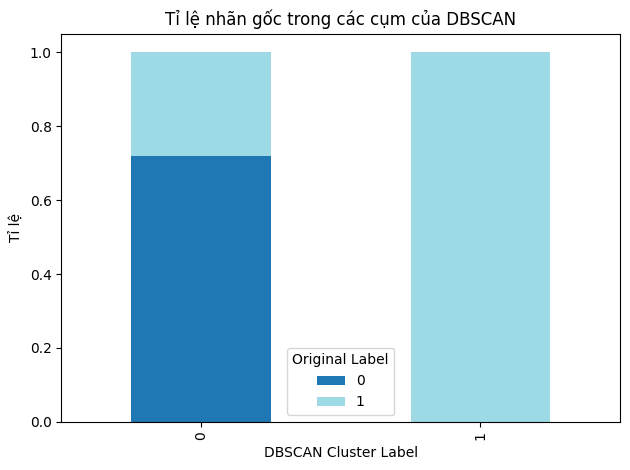

In [ ]:

df = pd.DataFrame({
    'cluster': dbscan_pca_labels,
    'original_label': y
})


cluster_counts = df[df.cluster != -1].groupby(['cluster', 'original_label']).size().unstack(fill_value=0)

cluster_proportions = cluster_counts.div(cluster_counts.sum(axis=1), axis=0)


cluster_proportions.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Tỉ lệ nhãn gốc trong các cụm của DBSCAN')
plt.xlabel('DBSCAN Cluster Label')
plt.ylabel('Tỉ lệ')
plt.legend(title='Original Label')
plt.tight_layout()
plt.show()

## Split data

### Subtask:
Split the data into training and testing sets.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4137, 3000)
X_test shape: (1035, 3000)
y_train shape: (4137,)
y_test shape: (1035,)


## Apply pca

### Subtask:
Apply PCA to the scaled training data and transform both training and testing data.


In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

X_train_pca shape: (4137, 50)
X_test_pca shape: (1035, 50)


## Train and evaluate bernoulli naive bayes on pca data


In [ ]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate and train the Bernoulli Naive Bayes model on PCA data
bnb_pca = BernoulliNB()
bnb_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA test data
y_pred_bnb_pca = bnb_pca.predict(X_test_pca)

# Evaluate the model
accuracy_bnb_pca = accuracy_score(y_test, y_pred_bnb_pca)
conf_matrix_bnb_pca = confusion_matrix(y_test, y_pred_bnb_pca)
recall_bnb_pca = recall_score(y_test, y_pred_bnb_pca)
precision_bnb_pca = precision_score(y_test, y_pred_bnb_pca)
f1_bnb_pca = f1_score(y_test, y_pred_bnb_pca)

# Print the evaluation metrics
print("Bernoulli Naive Bayes on PCA-transformed data:")
print(f"  Accuracy: {accuracy_bnb_pca:.4f}")
print(f"  Confusion Matrix:\n{conf_matrix_bnb_pca}")
print(f"  Recall: {recall_bnb_pca:.4f}")
print(f"  Precision: {precision_bnb_pca:.4f}")
print(f"  F1-score: {f1_bnb_pca:.4f}")

Bernoulli Naive Bayes on PCA-transformed data:
  Accuracy: 0.8841
  Confusion Matrix:
[[671  68]
 [ 52 244]]
  Recall: 0.8243
  Precision: 0.7821
  F1-score: 0.8026


## Train and evaluate k-nearest neighbors on pca data


In [ ]:
# Instantiate and train the K-Nearest Neighbors model on PCA data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA test data
y_pred_knn_pca = knn_pca.predict(X_test_pca)

# Evaluate the model
accuracy_knn_pca = accuracy_score(y_test, y_pred_knn_pca)
conf_matrix_knn_pca = confusion_matrix(y_test, y_pred_knn_pca)
recall_knn_pca = recall_score(y_test, y_pred_knn_pca)
precision_knn_pca = precision_score(y_test, y_pred_knn_pca)
f1_knn_pca = f1_score(y_test, y_pred_knn_pca)

# Print the evaluation metrics
print("K-Nearest Neighbors on PCA-transformed data:")
print(f"  Accuracy: {accuracy_knn_pca:.4f}")
print(f"  Confusion Matrix:\n{conf_matrix_knn_pca}")
print(f"  Recall: {recall_knn_pca:.4f}")
print(f"  Precision: {precision_knn_pca:.4f}")
print(f"  F1-score: {f1_knn_pca:.4f}")

K-Nearest Neighbors on PCA-transformed data:
  Accuracy: 0.9507
  Confusion Matrix:
[[702  37]
 [ 14 282]]
  Recall: 0.9527
  Precision: 0.8840
  F1-score: 0.9171


## Train and evaluate logistic regression on pca data



In [ ]:
# Instantiate and train the Logistic Regression model on PCA data
logreg_pca = LogisticRegression(random_state=42)
logreg_pca.fit(X_train_pca, y_train)

# Make predictions on the PCA test data
y_pred_logreg_pca = logreg_pca.predict(X_test_pca)

# Evaluate the model
accuracy_logreg_pca = accuracy_score(y_test, y_pred_logreg_pca)
conf_matrix_logreg_pca = confusion_matrix(y_test, y_pred_logreg_pca)
recall_logreg_pca = recall_score(y_test, y_pred_logreg_pca)
precision_logreg_pca = precision_score(y_test, y_pred_logreg_pca)
f1_logreg_pca = f1_score(y_test, y_pred_logreg_pca)

# Print the evaluation metrics
print("Logistic Regression on PCA-transformed data:")
print(f"  Accuracy: {accuracy_logreg_pca:.4f}")
print(f"  Confusion Matrix:\n{conf_matrix_logreg_pca}")
print(f"  Recall: {recall_logreg_pca:.4f}")
print(f"  Precision: {precision_logreg_pca:.4f}")
print(f"  F1-score: {f1_logreg_pca:.4f}")

Logistic Regression on PCA-transformed data:
  Accuracy: 0.9507
  Confusion Matrix:
[[715  24]
 [ 27 269]]
  Recall: 0.9088
  Precision: 0.9181
  F1-score: 0.9134


## Split Original Data

In [28]:
from sklearn.model_selection import train_test_split

# Split the original data
# Make sure the cell defining X and y is executed before this cell.
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train_orig shape: {X_train_orig.shape}")
print(f"X_test_orig shape: {X_test_orig.shape}")
print(f"y_train_orig shape: {y_train_orig.shape}")
print(f"y_test_orig shape: {y_test_orig.shape}")

X_train_orig shape: (4137, 3000)
X_test_orig shape: (1035, 3000)
y_train_orig shape: (4137,)
y_test_orig shape: (1035,)


## Train and evaluate Bernoulli Naive Bayes on original data

In [29]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

# Instantiate and train the Bernoulli Naive Bayes model on original data
bnb_orig = BernoulliNB()
bnb_orig.fit(X_train_orig, y_train_orig)

# Make predictions on the original test data
y_pred_bnb_orig = bnb_orig.predict(X_test_orig)

# Evaluate the model
accuracy_bnb_orig = accuracy_score(y_test_orig, y_pred_bnb_orig)
conf_matrix_bnb_orig = confusion_matrix(y_test_orig, y_pred_bnb_orig)
recall_bnb_orig = recall_score(y_test_orig, y_pred_bnb_orig)
precision_bnb_orig = precision_score(y_test_orig, y_pred_bnb_orig)
f1_bnb_orig = f1_score(y_test_orig, y_pred_bnb_orig)

# Print the evaluation metrics
print("Bernoulli Naive Bayes on original data:")
print(f"  Accuracy: {accuracy_bnb_orig:.4f}")
print(f"  Confusion Matrix:\n{conf_matrix_bnb_orig}")
print(f"  Recall: {recall_bnb_orig:.4f}")
print(f"  Precision: {precision_bnb_orig:.4f}")
print(f"  F1-score: {f1_bnb_orig:.4f}")

Bernoulli Naive Bayes on original data:
  Accuracy: 0.8966
  Confusion Matrix:
[[695  44]
 [ 63 233]]
  Recall: 0.7872
  Precision: 0.8412
  F1-score: 0.8133


## Train and evaluate K-Nearest Neighbors on original data

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate and train the K-Nearest Neighbors model on original data
knn_orig = KNeighborsClassifier(n_neighbors=5) # Using default n_neighbors=5, can be tuned
knn_orig.fit(X_train_orig, y_train_orig)

# Make predictions on the original test data
y_pred_knn_orig = knn_orig.predict(X_test_orig)

# Evaluate the model
accuracy_knn_orig = accuracy_score(y_test_orig, y_pred_knn_orig)
conf_matrix_knn_orig = confusion_matrix(y_test_orig, y_pred_knn_orig)
recall_knn_orig = recall_score(y_test_orig, y_pred_knn_orig)
precision_knn_orig = precision_score(y_test_orig, y_pred_knn_orig)
f1_knn_orig = f1_score(y_test_orig, y_pred_knn_orig)

# Print the evaluation metrics
print("K-Nearest Neighbors on original data:")
print(f"  Accuracy: {accuracy_knn_orig:.4f}")
print(f"  Confusion Matrix:\n{conf_matrix_knn_orig}")
print(f"  Recall: {recall_knn_orig:.4f}")
print(f"  Precision: {precision_knn_orig:.4f}")
print(f"  F1-score: {f1_knn_orig:.4f}")

K-Nearest Neighbors on original data:
  Accuracy: 0.8628
  Confusion Matrix:
[[646  93]
 [ 49 247]]
  Recall: 0.8345
  Precision: 0.7265
  F1-score: 0.7767


## Train and evaluate Logistic Regression on original data

In [31]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the Logistic Regression model on original data
logreg_orig = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence
logreg_orig.fit(X_train_orig, y_train_orig)

# Make predictions on the original test data
y_pred_logreg_orig = logreg_orig.predict(X_test_orig)

# Evaluate the model
accuracy_logreg_orig = accuracy_score(y_test_orig, y_pred_logreg_orig)
conf_matrix_logreg_orig = confusion_matrix(y_test_orig, y_pred_logreg_orig)
recall_logreg_orig = recall_score(y_test_orig, y_pred_logreg_orig)
precision_logreg_orig = precision_score(y_test_orig, y_pred_logreg_orig)
f1_logreg_orig = f1_score(y_test_orig, y_pred_logreg_orig)

# Print the evaluation metrics
print("Logistic Regression on original data:")
print(f"  Accuracy: {accuracy_logreg_orig:.4f}")
print(f"  Confusion Matrix:\n{conf_matrix_logreg_orig}")
print(f"  Recall: {recall_logreg_orig:.4f}")
print(f"  Precision: {precision_logreg_orig:.4f}")
print(f"  F1-score: {f1_logreg_orig:.4f}")

Logistic Regression on original data:
  Accuracy: 0.9720
  Confusion Matrix:
[[722  17]
 [ 12 284]]
  Recall: 0.9595
  Precision: 0.9435
  F1-score: 0.9514
